<a href="https://colab.research.google.com/github/prav-kotte1/DM-Lab/blob/main/dmLabMajor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)

In [2]:
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")
path

Using Colab cache for faster access to the 'heart-disease-data' dataset.


'/kaggle/input/heart-disease-data'

In [3]:
df = pd.read_csv(path + "/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

target = "num"
num_cols = [c for c in num_cols if c != target]
cat_cols = [c for c in cat_cols if c != target]

num_cols, cat_cols


(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'],
 ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

In [5]:
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

/tmp/ipython-input-3667323106.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].fillna(df[c].mode()[0])


In [6]:
ct = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

X = ct.fit_transform(df[num_cols + cat_cols])

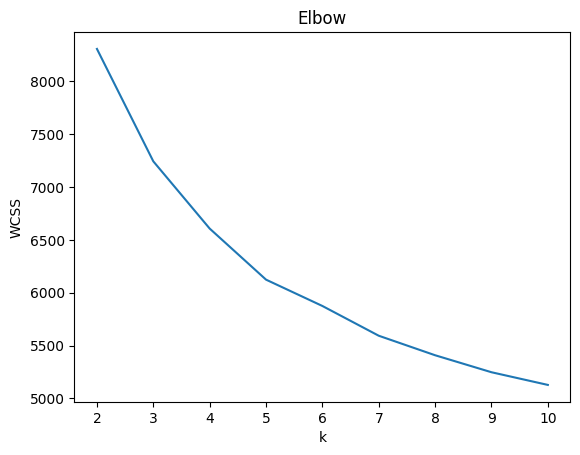

In [7]:
wcss = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(K_range, wcss)
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Elbow")
plt.show()

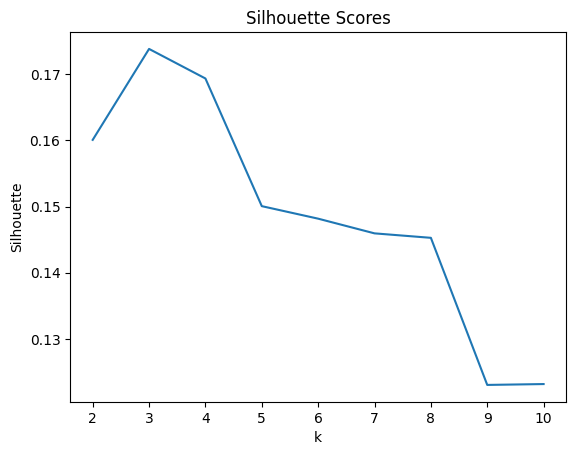

In [8]:
sil = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    labels = km.fit_predict(X)
    sil.append(silhouette_score(X, labels))

plt.plot(K_range, sil)
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.title("Silhouette Scores")
plt.show()

In [9]:
best_k = K_range[sil.index(max(sil))]
km = KMeans(n_clusters=best_k, random_state=0)
labels = km.fit_predict(X)

df["cluster"] = labels
df["cluster"].value_counts()

,count
cluster,
0,399
1,386
2,135


In [10]:
cluster_id = 0
sub = df[df["cluster"] == cluster_id]

sub[num_cols + [target]].mean().sort_values(ascending=False)

,0
id,317.493734
chol,236.516291
thalch,152.498747
trestbps,128.378446
age,47.373434
oldpeak,0.395489
num,0.280702
ca,0.027569
